In [1]:
#Data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set()

In [2]:
#import dataframes
df1 = pd.read_csv('newRansom.csv')
df2 = pd.read_csv('newBenign.csv')

#drop extra first column
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)

#remove the name column (string)
df1 = df1.drop('Name', axis=1)
df2 = df2.drop('Name', axis=1)

In [3]:
# Check for duplicated rows
# 159 duplicates
# 139 duplicates
bool_series = df1.duplicated(keep = 'last').sum()
bool_series2 = df2.duplicated().sum()
print("total rows:  Ransom:" + str(len(df1)) + " | Benign: " + str(len(df2)))
print("duplicated rows: Ransom:" + str(bool_series) + " | Benign: " + str(bool_series2))

total rows:  Ransom:1790 | Benign: 1653
duplicated rows: Ransom:1706 | Benign: 239


In [4]:
# Remove duplicated rows
df1 = df1.drop_duplicates(keep = 'last')
df2 = df2.drop_duplicates(keep = 'last')
bool_series = df1.duplicated().sum()
bool_series2 = df2.duplicated().sum()
print("duplicated rows:  ransom:" + str(bool_series) + " |  benign: " + str(bool_series2))

duplicated rows:  ransom:0 |  benign: 0


In [5]:
print("total rows:  Ransom:" + str(len(df1)) + " | Benign: " + str(len(df2)))

total rows:  Ransom:84 | Benign: 1414


In [6]:
#label the dataframes
df1['label'] = 'Ransomware'
df2['label'] = 'Benign'

#shrink benign
df2 = df2.sample(frac=1)
df2 = df2.iloc[0:84]

#join the dataframes into 1 dataframe (df3)
frames = [df1, df2]
df3 = pd.concat(frames)

#shuffle!
df3 = df3.sample(frac=1)
df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)

In [7]:
df3

,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,...,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto,label
1334,6,4,49,0,0,0,0,0,0,0,...,0,0,235,185,23,0,0,0,291,Benign
541,5,1,6,1,1,1,1,1,1,1,...,0,0,5,22,14,2,0,0,0,Ransomware
836,11,14,60,0,0,0,0,0,0,0,...,0,0,87,68,176,0,0,0,105,Benign
73,2,4,5,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Ransomware
179,1,3,5,0,0,0,1,0,0,1,...,0,0,2,37,10,1,0,11,17,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,7,3,2,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Ransomware
38,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ransomware
1472,14,28,45,0,0,0,0,0,0,0,...,0,0,119,65,24,0,0,0,92,Benign
134,1,2,1,0,0,0,1,0,0,0,...,0,0,7,6,15,1,0,0,24,Ransomware


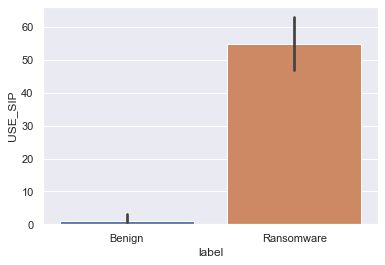

In [8]:
#from numpy import count_nonzero
#estimator=count_nonzero if you want counts, not avg
from numpy import count_nonzero

sns.barplot(y=df3['USE_SIP'], x = df3['label'] , estimator = count_nonzero)
plt.show()

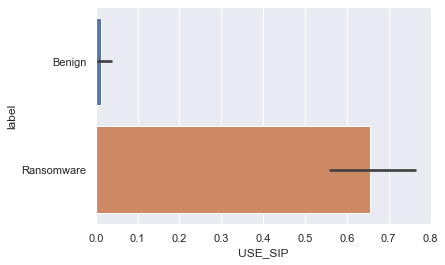

In [9]:
sns.barplot(x = df3['USE_SIP'], y = df3['label'])
plt.show()

In [10]:
#Visualize data
#df2.describe()
df3.describe()

,receiver,service,activity,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,4.482143,6.154762,20.327381,0.339286,0.339286,0.482143,0.410714,0.345238,0.446429,0.500000,...,2.589286,0.0,0.005952,43.720238,35.702381,14.136905,0.202381,0.029762,12.523810,197.059524
std,6.957504,10.321762,41.471222,0.474882,0.474882,0.501175,0.493434,0.476867,0.498608,0.501495,...,4.260008,0.0,0.077152,76.989845,73.960627,43.348874,0.614783,0.170438,91.270668,1354.617708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.0,0.000000,8.500000,7.000000,4.000000,0.000000,0.000000,0.000000,7.000000
75%,5.000000,7.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,0.0,0.000000,56.250000,34.000000,12.000000,0.000000,0.000000,0.000000,76.500000
max,47.000000,55.000000,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,22.000000,0.0,1.000000,556.000000,651.000000,489.000000,3.000000,1.000000,972.000000,13913.000000


In [11]:
# Define Validation method
# Train and validation set split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# change label to be a category
#df3["label"] = df3["label"].astype('category')

array = df3.values

#All of the non-label columns
X = array[:, 0:-1]

#label column
y = array[:, -1]

#USING CHI2 (current (X_new))
z = SelectKBest(chi2, k=25)
X_new = z.fit_transform(X, y)
X_new.shape

#Obtain the train/validation datasets on a 80/20 split
#TODO same w/ tenfold cross val
# compare results
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.30, random_state=12)

In [12]:
cols = z.get_support(indices=True)
features_df_new = df3.iloc[:,cols]
list(features_df_new.columns)

['receiver',
 'service',
 'activity',
 'PROCESS_OUTGOING_CALLS',
 'SEND_SMS',
 'RECEIVE_SMS',
 'CALL_LOG',
 'DEVICE_ADMIN_ENABLED',
 'QUICKBOOT_POWERON',
 'REBOOT',
 'setReadable',
 'setWritable',
 'Cipher',
 'execSQL',
 'SQLiteDatabase',
 'openConnection',
 'getFilesDir',
 'getCacheDir',
 'getExternalFilesDir',
 'getExternalCacheDir',
 'FileInputStream',
 'getSharedPreferences',
 'telephony',
 'wallpaper',
 'crypto']

In [13]:
from sklearn.ensemble import VotingClassifier

#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=12000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto', max_iter=10000)))
models.append(('RF', RandomForestClassifier()))
models.append(('CNN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.958333 (0.067185)
LDA: 0.794697 (0.135750)
KNN: 0.863636 (0.077924)
CART: 0.939394 (0.056894)
SVM: 0.745455 (0.096316)
RF: 0.965909 (0.041804)
CNN: 0.941667 (0.098953)


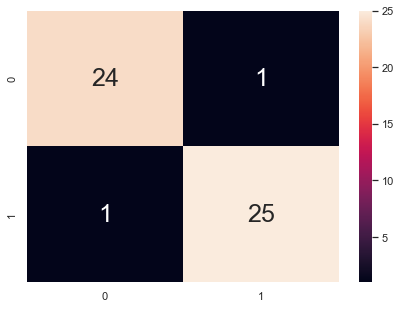

0.9607843137254902
[[24  1]
 [ 1 25]]
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        25
  Ransomware       0.96      0.96      0.96        26

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



In [19]:
from sklearn.metrics import plot_confusion_matrix

# Make predictions on validation dataset using one model
#model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)
model = RandomForestClassifier(n_estimators=25, max_depth = 3, random_state=111)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

fig, ax = plt.subplots(figsize=(7, 5))
cfm = confusion_matrix(Y_validation, predictions)
sns.heatmap(cfm, annot=True, annot_kws={"size": 25}, ax=ax)
plt.show()

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [15]:
# Making an ensamble out of multiple classifiers
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr', dual=False, max_iter=12000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=12)
clf3 = DecisionTreeClassifier()
clf4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 100000)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('cnn', clf4)],
                        voting='hard')

# Make predictions on validation dataset
model = eclf
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("Ensamble accuracy: " + str(accuracy_score(Y_validation, predictions)))
print("Matrix: ")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" %
          (scores.mean(), scores.std(), label))

Ensamble accuracy: 0.9215686274509803
Matrix: 
[[23  2]
 [ 2 24]]
              precision    recall  f1-score   support

      Benign       0.92      0.92      0.92        25
  Ransomware       0.92      0.92      0.92        26

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51

Accuracy: 0.94064 (+/- 0.03206) [Logistic Regression]
Accuracy: 0.97647 (+/- 0.02201) [Random Forest]
Accuracy: 0.92317 (+/- 0.04364) [Dec. Tree]
Accuracy: 0.95258 (+/- 0.03014) [CNN]
Accuracy: 0.95865 (+/- 0.02993) [Ensamble]
